In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression #modulo que nos da a regressão linear
import statsmodels.formula.api as sm

In [6]:
df = pd.read_csv("mt_cars.csv", sep = ",")
df = df.drop(["Unnamed: 0"], axis= 1)
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [18]:
#separando variaveis
#X =  Cilindradas
#y = milhas por galao
X = df.iloc[:, 2]
y = df.iloc[:, 0]

In [30]:
# verificando sua correlação
#negativa e fraca logo o eixo da regrssão sera negativo o que signifca que enquanto uma ariavel cresce a utra diminui
# maior a cilindrada, menas milhas ele vai fazer
corr = np.corrcoef(X, y)
corr

array([[ 1.        , -0.84755138],
       [-0.84755138,  1.        ]])

In [27]:
## criando o modelo de treino
arr2 = X.values.reshape(-1, 1)

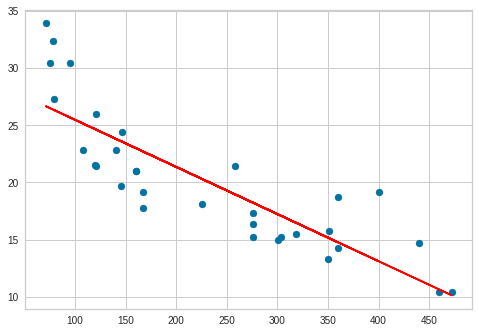

In [29]:
modeloDeTreino = LinearRegression()
modeloDeTreino.fit(arr2, y)

plt.scatter(arr2, y)
plt.plot(arr2, modeloDeTreino.predict(arr2), color = "red")

In [34]:
previsoes = modeloDeTreino.predict([[200]])
previsoes

array([21.35683076])

In [44]:
## utilizando variaveis multiplas, ao inves de xy, iremos pegar xyz da base
x1 = df.iloc[:,1:4].values
x1

array([[  6. , 160. , 110. ],
       [  6. , 160. , 110. ],
       [  4. , 108. ,  93. ],
       [  6. , 258. , 110. ],
       [  8. , 360. , 175. ],
       [  6. , 225. , 105. ],
       [  8. , 360. , 245. ],
       [  4. , 146.7,  62. ],
       [  4. , 140.8,  95. ],
       [  6. , 167.6, 123. ],
       [  6. , 167.6, 123. ],
       [  8. , 275.8, 180. ],
       [  8. , 275.8, 180. ],
       [  8. , 275.8, 180. ],
       [  8. , 472. , 205. ],
       [  8. , 460. , 215. ],
       [  8. , 440. , 230. ],
       [  4. ,  78.7,  66. ],
       [  4. ,  75.7,  52. ],
       [  4. ,  71.1,  65. ],
       [  4. , 120.1,  97. ],
       [  8. , 318. , 150. ],
       [  8. , 304. , 150. ],
       [  8. , 350. , 245. ],
       [  8. , 400. , 175. ],
       [  4. ,  79. ,  66. ],
       [  4. , 120.3,  91. ],
       [  4. ,  95.1, 113. ],
       [  8. , 351. , 264. ],
       [  6. , 145. , 175. ],
       [  8. , 301. , 335. ],
       [  4. , 121. , 109. ]])

In [54]:
y1 = df.iloc[:,0].values
modelo2 = LinearRegression()
modelo2.fit(x1, y1)
modelo2.score(x1, y1)

0.7678877440928638

In [52]:
## CRIANDO MODELO PARA REGRESSÃO LINEAR MULTIPLA, PU SEJA, UTILIZANDO MAIS VARIAVEIS
modeloAjustado = sm.ols(formula = "mpg ~ cyl + disp + hp", data = df)
modeloTreinado2 = modeloAjustado.fit()
modeloTreinado2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     30.88
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           5.05e-09
Time:                        00:36:37   Log-Likelihood:                -79.009
No. Observations:                  32   AIC:                             166.0
Df Residuals:                      28   BIC:                             171.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.1849      2.591     13.195      0.000      28.878      39.492
cyl           -1.2274      0.797     -1.540      0.135      -2.861       0.406
disp          -0.0188      0.010     -1.811      0.081      -0.040       0.002
hp            -0.0147      0.015     -1.002      0.325      -0.045       0.015
==============================================================================
Omnibus:                        2.942   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                2.558
Skew:                           0.675   Prob(JB):                        0.278
Kurtosis:                       2.692   Cond. No.                     1.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
## Mais variaveis utilizadas nos obriga a fornecar mais dados para relizar uma predição

In [64]:
novoPredict = np.array([4, 200, 100])
novoPredict = novoPredict.reshape(1, -1)
novoPredict
modelo2.predict(novoPredict)

array([24.03968887])